## Times Series Forecasting

### Import Libraries

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.4 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary

no display found. Using non-interactive Agg backend


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load, convert Amtrak data for time series analysis
Amtrak_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Amtrak/Amtrak.csv', squeeze=True)

In [ ]:
##Create column 'Date' that is a date data type
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df.head(9)

,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-02-01
2,01/03/1991,1972.715,1991-03-01
3,01/04/1991,1811.665,1991-04-01
4,01/05/1991,1974.964,1991-05-01
5,01/06/1991,1862.356,1991-06-01
6,01/07/1991,1939.860,1991-07-01
7,01/08/1991,2013.264,1991-08-01
8,01/09/1991,1595.657,1991-09-01


In [ ]:
# load data and convert to time series
Amtrak_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Amtrak/Amtrak.csv', squeeze=True)
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)

Text(0, 0.5, 'Ridership (in 000s)')

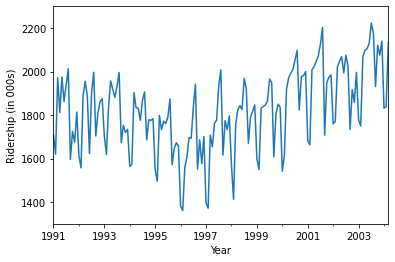

In [ ]:
# Pandas Version
ridership_ts.plot(ylim=[1300, 2300], legend=False)
plt.xlabel('Year'); plt.ylabel('Ridership (in 000s)')

In [ ]:
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date, name='Ridership')

In [ ]:
# define the time series frequency
ridership_ts.index = pd.DatetimeIndex(ridership_ts.index, freq=ridership_ts.index.inferred_freq)

### Monthly ridership on Amtrak trains (in thousands) from January 1991 to March 2004


(1300.0, 2300.0)

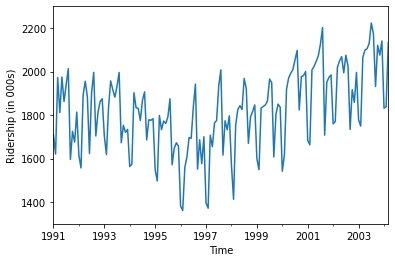

In [ ]:
ax = ridership_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
ax.set_ylim(1300, 2300)

In [ ]:
# create short time series from 1997 to 1999 using a slice 
ridership_ts_3yrs = ridership_ts['1997':'1999']

In [ ]:
# create a data frame with additional predictors from time series
# the following command adds a constant term, a trend term and a quadratic trend term
ridership_df = tsatools.add_trend(ridership_ts, trend='ctt')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
ridership_df

,Ridership,const,trend,trend_squared
Date,,,,
1991-01-01,1708.917,1.0,1.0,1.0
1991-02-01,1620.586,1.0,2.0,4.0
1991-03-01,1972.715,1.0,3.0,9.0
1991-04-01,1811.665,1.0,4.0,16.0
1991-05-01,1974.964,1.0,5.0,25.0
...,...,...,...,...
2003-11-01,2076.054,1.0,155.0,24025.0
2003-12-01,2140.677,1.0,156.0,24336.0
2004-01-01,1831.508,1.0,157.0,24649.0


In [ ]:
# fit a linear trend model to the time series
ridership_df = tsatools.add_trend(ridership_ts, trend='ctt')
ridership_lm = sm.ols(formula='Ridership ~ trend + trend_squared', data=ridership_df).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
ridership_df

,Ridership,const,trend,trend_squared
Date,,,,
1991-01-01,1708.917,1.0,1.0,1.0
1991-02-01,1620.586,1.0,2.0,4.0
1991-03-01,1972.715,1.0,3.0,9.0
1991-04-01,1811.665,1.0,4.0,16.0
1991-05-01,1974.964,1.0,5.0,25.0
...,...,...,...,...
2003-11-01,2076.054,1.0,155.0,24025.0
2003-12-01,2140.677,1.0,156.0,24336.0
2004-01-01,1831.508,1.0,157.0,24649.0


### Plots that enhance the different components of the time series. (a) Zoom-in to 3 years of data. (b) Original series with overlaid quadratic trendline

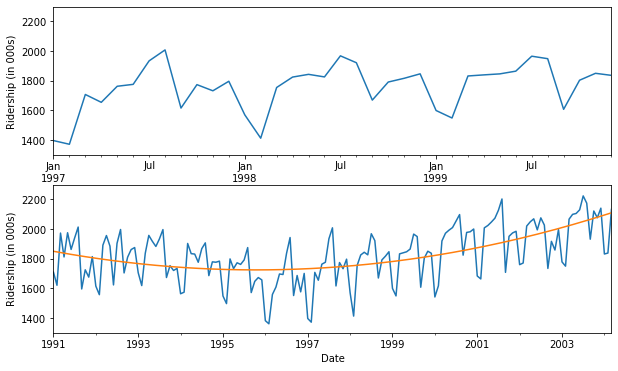

In [ ]:
# shorter and longer time series
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
ridership_ts_3yrs.plot(ax=axes[0])
ridership_ts.plot(ax=axes[1])
for ax in axes:
    ax.set_xlabel('Time')
    ax.set_ylabel('Ridership (in 000s)')
    ax.set_ylim(1300, 2300)
ridership_lm.predict(ridership_df).plot(ax=axes[1])
plt.show()

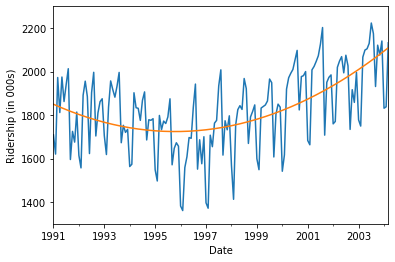

In [ ]:
# plot the time series
ax = ridership_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
ax.set_ylim(1300, 2300)
ridership_lm.predict(ridership_df).plot(ax=ax)
plt.show()

### Split data

### Code for Naive and seasonal naive forecasts in a 3-year validation set for Amtrak ridership


In [ ]:
nValid = 36
nTrain = len(ridership_ts) - nValid
# partition the data
train_ts = ridership_ts[:nTrain]
valid_ts = ridership_ts[nTrain:]
# generate the naive and seasonal naive forecast
naive_pred = pd.Series(train_ts[-1], index=valid_ts.index)
last_season = train_ts[-12:]
seasonal_pred = pd.Series(pd.concat([last_season]*5)[:len(valid_ts)].values, index=valid_ts.index)

In [ ]:
train_ts

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2000-11-01    1981.408
2000-12-01    2000.153
2001-01-01    1683.148
2001-02-01    1663.404
2001-03-01    2007.928
Freq: MS, Name: Ridership, Length: 123, dtype: float64

In [ ]:
valid_ts

Date
2001-04-01    2023.792
2001-05-01    2047.008
2001-06-01    2072.913
2001-07-01    2126.717
2001-08-01    2202.638
2001-09-01    1707.693
2001-10-01    1950.716
2001-11-01    1973.614
2001-12-01    1984.729
2002-01-01    1759.629
2002-02-01    1770.595
2002-03-01    2019.912
2002-04-01    2048.398
2002-05-01    2068.763
2002-06-01    1994.267
2002-07-01    2075.258
2002-08-01    2026.560
2002-09-01    1734.155
2002-10-01    1916.771
2002-11-01    1858.345
2002-12-01    1996.352
2003-01-01    1778.033
2003-02-01    1749.489
2003-03-01    2066.466
2003-04-01    2098.899
2003-05-01    2104.911
2003-06-01    2129.671
2003-07-01    2223.349
2003-08-01    2174.360
2003-09-01    1931.406
2003-10-01    2121.470
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Freq: MS, Name: Ridership, dtype: float64

In [ ]:
naive_pred

Date
2001-04-01    2007.928
2001-05-01    2007.928
2001-06-01    2007.928
2001-07-01    2007.928
2001-08-01    2007.928
2001-09-01    2007.928
2001-10-01    2007.928
2001-11-01    2007.928
2001-12-01    2007.928
2002-01-01    2007.928
2002-02-01    2007.928
2002-03-01    2007.928
2002-04-01    2007.928
2002-05-01    2007.928
2002-06-01    2007.928
2002-07-01    2007.928
2002-08-01    2007.928
2002-09-01    2007.928
2002-10-01    2007.928
2002-11-01    2007.928
2002-12-01    2007.928
2003-01-01    2007.928
2003-02-01    2007.928
2003-03-01    2007.928
2003-04-01    2007.928
2003-05-01    2007.928
2003-06-01    2007.928
2003-07-01    2007.928
2003-08-01    2007.928
2003-09-01    2007.928
2003-10-01    2007.928
2003-11-01    2007.928
2003-12-01    2007.928
2004-01-01    2007.928
2004-02-01    2007.928
2004-03-01    2007.928
Freq: MS, dtype: float64

In [ ]:
last_season

Date
2000-04-01    1971.493
2000-05-01    1992.301
2000-06-01    2009.763
2000-07-01    2053.996
2000-08-01    2097.471
2000-09-01    1823.706
2000-10-01    1976.997
2000-11-01    1981.408
2000-12-01    2000.153
2001-01-01    1683.148
2001-02-01    1663.404
2001-03-01    2007.928
Freq: MS, Name: Ridership, dtype: float64

In [ ]:
seasonal_pred

Date
2001-04-01    1971.493
2001-05-01    1992.301
2001-06-01    2009.763
2001-07-01    2053.996
2001-08-01    2097.471
2001-09-01    1823.706
2001-10-01    1976.997
2001-11-01    1981.408
2001-12-01    2000.153
2002-01-01    1683.148
2002-02-01    1663.404
2002-03-01    2007.928
2002-04-01    1971.493
2002-05-01    1992.301
2002-06-01    2009.763
2002-07-01    2053.996
2002-08-01    2097.471
2002-09-01    1823.706
2002-10-01    1976.997
2002-11-01    1981.408
2002-12-01    2000.153
2003-01-01    1683.148
2003-02-01    1663.404
2003-03-01    2007.928
2003-04-01    1971.493
2003-05-01    1992.301
2003-06-01    2009.763
2003-07-01    2053.996
2003-08-01    2097.471
2003-09-01    1823.706
2003-10-01    1976.997
2003-11-01    1981.408
2003-12-01    2000.153
2004-01-01    1683.148
2004-02-01    1663.404
2004-03-01    2007.928
Freq: MS, dtype: float64

In [ ]:
nValid

36

In [ ]:
nTrain

123

In [ ]:
ridership_ts

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Freq: MS, Name: Ridership, Length: 159, dtype: float64

### Plots that enhance the different components of the time series

(a) Zoom-in to 3 years of data

(b) Original series with overlaid quadratic trendline


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


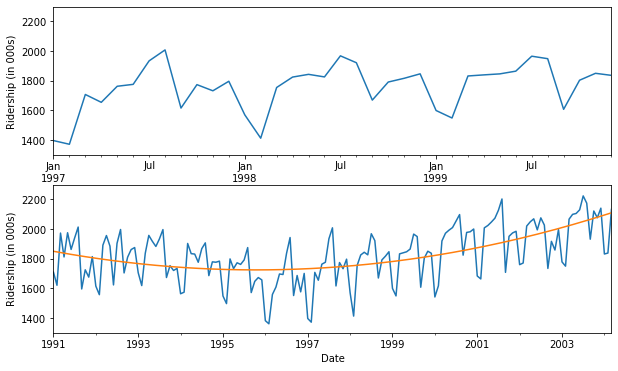

In [ ]:
# create short time series from 1997 to 1999 using a slice 
ridership_ts_3yrs = ridership_ts['1997':'1999']
# create a data frame with additional predictors from time series
# the following command adds a constant term, a trend term and a quadratic trend term
ridership_df = tsatools.add_trend(ridership_ts, trend='ctt')
# fit a linear regression model to the time series
ridership_lm = sm.ols(formula='Ridership ~ trend + trend_squared', data=ridership_df).fit()
# shorter and longer time series
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
ridership_ts_3yrs.plot(ax=axes[0])
ridership_ts.plot(ax=axes[1])
for ax in axes:
 ax.set_xlabel('Time')
 ax.set_ylabel('Ridership (in 000s)')
 ax.set_ylim(1300, 2300)
ridership_lm.predict(ridership_df).plot(ax=axes[1])
plt.show()

### Naive and seasonal naive forecasts in a 3-year validation set for Amtrak ridership

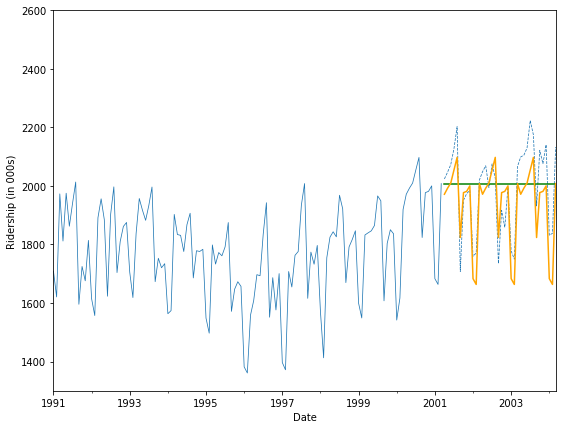

In [ ]:
# plot forecasts and actual in the training and validation sets
ax = train_ts.plot(color='C0', linewidth=0.75, figsize=
(9,7))
valid_ts.plot(ax=ax, color='C0', linestyle='dashed',
linewidth=0.75)
ax.set_xlim('1990', '2006-6')
ax.set_ylim(1300, 2600)
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
naive_pred.plot(ax=ax, color='green')
seasonal_pred.plot(ax=ax, color='orange')

#### Method 2

In [ ]:
nValid = 36
nTrain = len(ridership_ts) - nValid
# partition the data
train_ts = ridership_ts[:nTrain]
valid_ts = ridership_ts[nTrain:]
# generate the naive and seasonal naive forecast
naive_pred = pd.Series(train_ts[-1], index=valid_ts.index)
last_season = train_ts[-12:]
seasonal_pred = pd.Series(pd.concat([last_season]*5)[:len(valid_ts)].values, index=valid_ts.index)


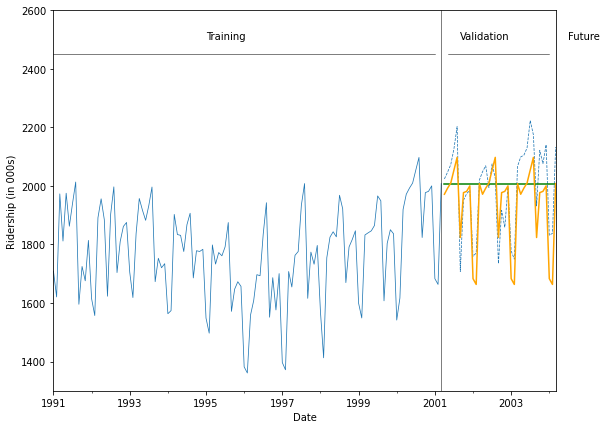

In [ ]:
# plot forecasts and actual in the training and validation sets
ax = train_ts.plot(color='C0', linewidth=0.75, figsize= (9,7))
valid_ts.plot(ax=ax, color='C0', linestyle='dashed', linewidth=0.75)
ax.set_xlim('1990', '2006-6')
ax.set_ylim(1300, 2600)
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
naive_pred.plot(ax=ax, color='green')
seasonal_pred.plot(ax=ax, color='orange')
# determine coordinates for drawing the arrows and lines
one_month = pd.Timedelta('31 days')
xtrain = (min(train_ts.index), max(train_ts.index) - one_month)
xvalid = (min(valid_ts.index) + one_month, max(valid_ts.index) - one_month)
xfuture = (max(valid_ts.index) + one_month, '2006')
xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])
xvf = xvalid[1] + 0.5 * (xfuture[0] - xvalid[1])
ax.add_line(plt.Line2D(xtrain, (2450, 2450), color='black', linewidth=0.5))
ax.add_line(plt.Line2D(xvalid, (2450, 2450), color='black', linewidth=0.5))
ax.add_line(plt.Line2D(xfuture, (2450, 2450), color='black', linewidth=0.5))
ax.text('1995', 2500, 'Training')
ax.text('2001-9', 2500, 'Validation')
ax.text('2004-7', 2500, 'Future')
ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)
plt.show()

### Predictive accuracy of naive and seasonal naive forecasts in the validation and training set for Amtrak ridership

This chart compares the accuracies of these two naive forecasts.
Because Amtrak ridership has monthly seasonality, the seasonal
naive forecast is the clear winner on both training and validation and
on all popular measures. In choosing between the two models, the
accuracy on the validation set is more relevant than the accuracy on
the training set. Performance on the validation set is more indicative
of how the models will perform in the future.

#### Validation Set

In [ ]:
regressionSummary(valid_ts, naive_pred)


Regression statistics

                      Mean Error (ME) : -14.7177
       Root Mean Squared Error (RMSE) : 142.7551
            Mean Absolute Error (MAE) : 115.9234
          Mean Percentage Error (MPE) : -1.2750
Mean Absolute Percentage Error (MAPE) : 6.0214


In [ ]:
 regressionSummary(valid_ts, seasonal_pred)


Regression statistics

                      Mean Error (ME) : 54.7296
       Root Mean Squared Error (RMSE) : 95.6243
            Mean Absolute Error (MAE) : 84.0941
          Mean Percentage Error (MPE) : 2.6528
Mean Absolute Percentage Error (MAPE) : 4.2477


#### Training set

In [ ]:
# calculate naive metrics for training set (shifted by 1 month)
regressionSummary(train_ts[1:], train_ts[:-1])


Regression statistics

                      Mean Error (ME) : 2.4509
       Root Mean Squared Error (RMSE) : 168.1470
            Mean Absolute Error (MAE) : 125.2975
          Mean Percentage Error (MPE) : -0.3460
Mean Absolute Percentage Error (MAPE) : 7.2714


In [ ]:
 # calculate seasonal naive metrics for training set (shifted by 12 months)
regressionSummary(train_ts[12:], train_ts[:-12])


Regression statistics

                      Mean Error (ME) : 13.9399
       Root Mean Squared Error (RMSE) : 99.2656
            Mean Absolute Error (MAE) : 82.4920
          Mean Percentage Error (MPE) : 0.5851
Mean Absolute Percentage Error (MAPE) : 4.7153


## Regression-Based Forecasting

### Import Libraries

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

In [ ]:
# Load, convert Amtrak data for time series analysis
Amtrak_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Amtrak/Amtrak.csv', squeeze=True)

In [ ]:
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')

In [ ]:
Amtrak_df

,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-02-01
2,01/03/1991,1972.715,1991-03-01
3,01/04/1991,1811.665,1991-04-01
4,01/05/1991,1974.964,1991-05-01
...,...,...,...
154,01/11/2003,2076.054,2003-11-01
155,01/12/2003,2140.677,2003-12-01
156,01/01/2004,1831.508,2004-01-01
157,01/02/2004,1838.006,2004-02-01


Must set a name for Ridership column

In [ ]:
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date, name='Ridership')

In [ ]:
ridership_ts

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Name: Ridership, Length: 159, dtype: float64

In [ ]:
# fit a linear trend model to the time series
ridership_df = tsatools.add_trend(ridership_ts, trend='ct')
ridership_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Ridership,const,trend
Date,,,
1991-01-01,1708.917,1.0,1.0
1991-02-01,1620.586,1.0,2.0
1991-03-01,1972.715,1.0,3.0
1991-04-01,1811.665,1.0,4.0
1991-05-01,1974.964,1.0,5.0
...,...,...,...
2003-11-01,2076.054,1.0,155.0
2003-12-01,2140.677,1.0,156.0
2004-01-01,1831.508,1.0,157.0


In [ ]:
ridership_lm = sm.ols(formula='Ridership ~ trend', data=ridership_df).fit()

### A linear trend fit to Amtrak ridership


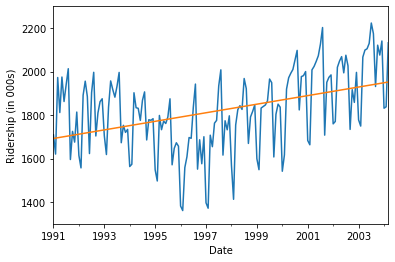

In [ ]:
# plot the time series
ax = ridership_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Ridership (in 000s)')
ax.set_ylim(1300, 2300)
ridership_lm.predict(ridership_df).plot(ax=ax)
plt.show()

### Split data

In [ ]:
ridership_ts

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Name: Ridership, Length: 159, dtype: float64

In [ ]:
ridership_df

,Ridership,const,trend
Date,,,
1991-01-01,1708.917,1.0,1.0
1991-02-01,1620.586,1.0,2.0
1991-03-01,1972.715,1.0,3.0
1991-04-01,1811.665,1.0,4.0
1991-05-01,1974.964,1.0,5.0
...,...,...,...
2003-11-01,2076.054,1.0,155.0
2003-12-01,2140.677,1.0,156.0
2004-01-01,1831.508,1.0,157.0


In [ ]:
nValid = 36
nTrain = len(ridership_df) - nValid
# partition the data
train_df = ridership_df[:nTrain]
valid_df = ridership_df[nTrain:]
# # generate the naive and seasonal naive forecast
# naive_pred = pd.Series(train_df[-1], index=valid_df.index)
# last_season = train_df[-12:]
# seasonal_pred = pd.Series(pd.concat([last_season]*5)[:len(valid_df)].values, index=valid_df.index)

In [ ]:
train_df

,Ridership,const,trend
Date,,,
1991-01-01,1708.917,1.0,1.0
1991-02-01,1620.586,1.0,2.0
1991-03-01,1972.715,1.0,3.0
1991-04-01,1811.665,1.0,4.0
1991-05-01,1974.964,1.0,5.0
...,...,...,...
2000-11-01,1981.408,1.0,119.0
2000-12-01,2000.153,1.0,120.0
2001-01-01,1683.148,1.0,121.0


### A linear trend fit to Amtrak ridership in the training period and forecasted in the validation period


In [ ]:
# fit linear model using training set and predict on validation set
ridership_lm = sm.ols(formula='Ridership ~ trend', data=train_df).fit()
predict_df = ridership_lm.predict(valid_df)

## Single Graph Layout

In [ ]:
def singleGraphLayout(ax, ylim, train_df, valid_df):
    ax.set_xlim('1990', '2004-6')
    ax.set_ylim(*ylim)
    ax.set_xlabel('Time')
    one_month = pd.Timedelta('31 days')
    xtrain = (min(train_df.index), max(train_df.index) - one_month)
    xvalid = (min(valid_df.index) + one_month, max(valid_df.index) - one_month)
    xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])
    ypos = 0.9 * ylim[1] + 0.1 * ylim[0]
    ax.add_line(plt.Line2D(xtrain, (ypos, ypos), color='black',linewidth=0.5))
    ax.add_line(plt.Line2D(xvalid, (ypos, ypos), color='black',linewidth=0.5))
    ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
    ypos = 0.925 * ylim[1] + 0.075 * ylim[0]
    ax.text('1995', ypos, 'Training')
    ax.text('2002-3', ypos, 'Validation')

## Graph Layout

In [ ]:
def graphLayout(axes, train_df, valid_df):
    singleGraphLayout(axes[0], [1300, 2550], train_df, valid_df)
    singleGraphLayout(axes[1], [-550, 550], train_df, valid_df)
    train_df.plot(y='Ridership', ax=axes[0], color='C0', linewidth=0.75)
    valid_df.plot(y='Ridership', ax=axes[0], color='C0', linestyle='dashed',
    linewidth=0.75)
    axes[1].axhline(y=0, xmin=0, xmax=1, color='black', linewidth=0.5)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Ridership (in 000s)')
    axes[1].set_ylabel('Forecast Errors')
    if axes[0].get_legend():
        axes[0].get_legend().remove()

### A linear trend fit to Amtrak ridership in the training period (a) and forecasted in the validation period (b)

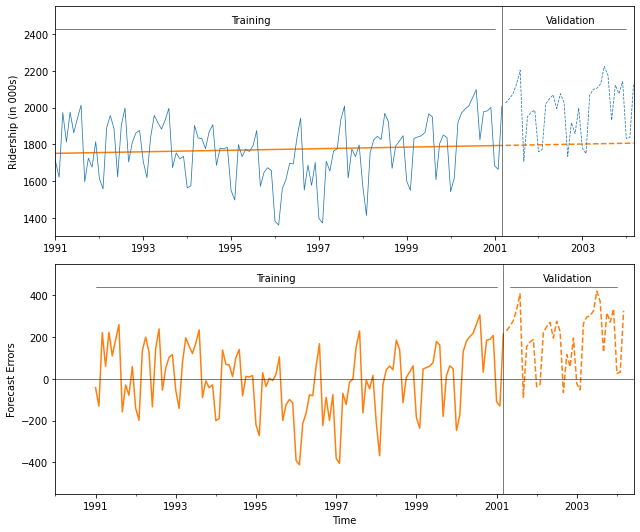

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5))
ridership_lm.predict(train_df).plot(ax=axes[0], color='C1')
ridership_lm.predict(valid_df).plot(ax=axes[0], color='C1', linestyle='dashed')
residual = train_df.Ridership - ridership_lm.predict(train_df)
residual.plot(ax=axes[1], color='C1')
residual = valid_df.Ridership - ridership_lm.predict(valid_df)
residual.plot(ax=axes[1], color='C1', linestyle='dashed')
graphLayout(axes, train_df, valid_df)
plt.tight_layout()
plt.show()

In [ ]:
ridership_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7456
Date:                Sat, 11 Jun 2022   Prob (F-statistic):              0.390
Time:                        20:43:32   Log-Likelihood:                -797.95
No. Observations:                 123   AIC:                             1600.
Df Residuals:                     121   BIC:                             1606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1750.3595     29.073     60.206      0.000    1692.802    1807.917
trend          0.3514      0.407      0.864      0.390      -0.454       1.157
==============================================================================
Omnibus:                        4.293   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.340
Skew:                          -0.435   Prob(JB):                        0.114
Kurtosis:                       2.700   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ridership_lm_linear = sm.ols(formula='Ridership ~ trend', data=train_df).fit()
predict_df_linear = ridership_lm_linear.predict(valid_df)

### Summary of output from a linear regression model applied to the Amtrak ridership data in the training period


In [ ]:
ridership_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7456
Date:                Sat, 11 Jun 2022   Prob (F-statistic):              0.390
Time:                        21:13:13   Log-Likelihood:                -797.95
No. Observations:                 123   AIC:                             1600.
Df Residuals:                     121   BIC:                             1606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1750.3595     29.073     60.206      0.000    1692.802    1807.917
trend          0.3514      0.407      0.864      0.390      -0.454       1.157
==============================================================================
Omnibus:                        4.293   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.340
Skew:                          -0.435   Prob(JB):                        0.114
Kurtosis:                       2.700   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ridership_lm_expo = sm.ols(formula='np.log(Ridership) ~ trend', data=train_df).fit()
predict_df_expo = ridership_lm_expo.predict(valid_df)

### Exponential (green) and linear (orange) trend used to forecast Amtrak ridership


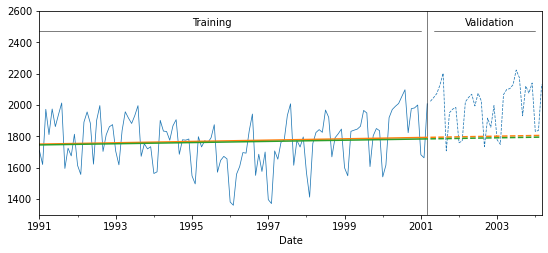

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,3.75))
train_df.plot(y='Ridership', ax=ax, color='C0', linewidth=0.75)
valid_df.plot(y='Ridership', ax=ax, color='C0', linestyle='dashed', linewidth=0.75)
singleGraphLayout(ax, [1300, 2600], train_df, valid_df)
ridership_lm_linear.predict(train_df).plot(color='C1')
ridership_lm_linear.predict(valid_df).plot(color='C1', linestyle='dashed')
ridership_lm_expo.predict(train_df).apply(lambda row: math.exp(row)).plot(color='C2')
ridership_lm_expo.predict(valid_df).apply(lambda row: math.exp(row)).plot(color='C2',  linestyle='dashed')
ax.get_legend().remove()
plt.show()

In [ ]:
ridership_lm_poly = sm.ols(formula='Ridership ~ trend + np.square(trend)',
data=train_df).fit()

In [ ]:
ridership_df = tsatools.add_trend(ridership_ts, trend='c')
ridership_df['Month'] = ridership_df.index.month

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# partition the data
train_df = ridership_df[:nTrain]
valid_df = ridership_df[nTrain:]
ridership_lm_season = sm.ols(formula='Ridership ~ C(Month)', data=train_df).fit()
ridership_lm_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     17.54
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.20e-19
Time:                        20:43:33   Log-Likelihood:                -736.38
No. Observations:                 123   AIC:                             1497.
Df Residuals:                     111   BIC:                             1531.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1573.9722     30.578     51.475      0.000    1513.381    1634.564
C(Month)[T.2]    -42.9302     43.243     -0.993      0.323    -128.620      42.759
C(Month)[T.3]    260.7677     43.243      6.030      0.000     175.078     346.457
C(Month)[T.4]    245.0919     44.311      5.531      0.000     157.286     332.897
C(Month)[T.5]    278.2222     44.311      6.279      0.000     190.417     366.028
C(Month)[T.6]    233.4598     44.311      5.269      0.000     145.654     321.265
C(Month)[T.7]    345.3265     44.311      7.793      0.000     257.521     433.132
C(Month)[T.8]    396.6595     44.311      8.952      0.000     308.854     484.465
C(Month)[T.9]     75.7615     44.311      1.710      0.090     -12.044     163.567
C(Month)[T.10]   200.6076     44.311      4.527      0.000     112.802     288.413
C(Month)[T.11]   192.3552     44.311      4.341      0.000     104.550     280.161
C(Month)[T.12]   230.4151     44.311      5.200      0.000     142.610     318.221
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.452
Skew:                          -0.145   Prob(JB):                        0.798
Kurtosis:                       2.937   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
train_df

,Ridership,const,Month
Date,,,
1991-01-01,1708.917,1.0,1
1991-02-01,1620.586,1.0,2
1991-03-01,1972.715,1.0,3
1991-04-01,1811.665,1.0,4
1991-05-01,1974.964,1.0,5
...,...,...,...
2000-11-01,1981.408,1.0,11
2000-12-01,2000.153,1.0,12
2001-01-01,1683.148,1.0,1


In [ ]:
ridership_df = tsatools.add_trend(ridership_ts, trend='ct')
ridership_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Ridership,const,trend
Date,,,
1991-01-01,1708.917,1.0,1.0
1991-02-01,1620.586,1.0,2.0
1991-03-01,1972.715,1.0,3.0
1991-04-01,1811.665,1.0,4.0
1991-05-01,1974.964,1.0,5.0
...,...,...,...
2003-11-01,2076.054,1.0,155.0
2003-12-01,2140.677,1.0,156.0
2004-01-01,1831.508,1.0,157.0


In [ ]:
ridership_df

,Ridership,const,trend
Date,,,
1991-01-01,1708.917,1.0,1.0
1991-02-01,1620.586,1.0,2.0
1991-03-01,1972.715,1.0,3.0
1991-04-01,1811.665,1.0,4.0
1991-05-01,1974.964,1.0,5.0
...,...,...,...
2003-11-01,2076.054,1.0,155.0
2003-12-01,2140.677,1.0,156.0
2004-01-01,1831.508,1.0,157.0


In [ ]:
nValid = 36
nTrain = len(ridership_df) - nValid
# partition the data
train_df = ridership_df[:nTrain]
valid_df = ridership_df[nTrain:]

In [ ]:
train_df

,Ridership,const,trend
Date,,,
1991-01-01,1708.917,1.0,1.0
1991-02-01,1620.586,1.0,2.0
1991-03-01,1972.715,1.0,3.0
1991-04-01,1811.665,1.0,4.0
1991-05-01,1974.964,1.0,5.0
...,...,...,...
2000-11-01,1981.408,1.0,119.0
2000-12-01,2000.153,1.0,120.0
2001-01-01,1683.148,1.0,121.0


### Quadratic trend model used to forecast Amtrak ridership. Plots of fitted, forecasted, and actual values (a) and forecast errors (b)


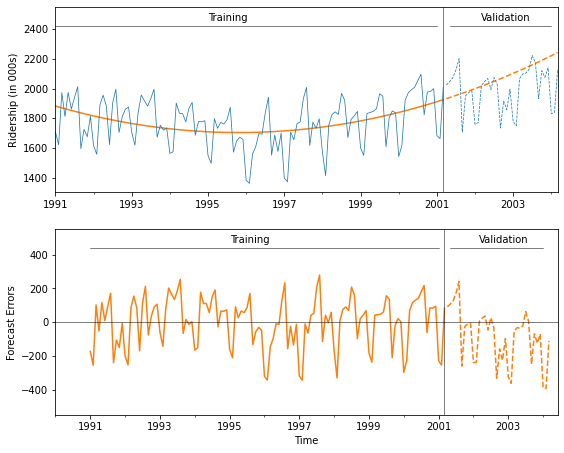

In [ ]:
ridership_lm_poly = sm.ols(formula='Ridership ~ trend + np.square(trend)', data=train_df).fit()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5))
ridership_lm_poly.predict(train_df).plot(ax=axes[0], color='C1')
ridership_lm_poly.predict(valid_df).plot(ax=axes[0], color='C1', linestyle='dashed')
residual = train_df.Ridership - ridership_lm_poly.predict(train_df)
residual.plot(ax=axes[1], color='C1')
residual = valid_df.Ridership - ridership_lm_poly.predict(valid_df)
residual.plot(ax=axes[1], color='C1', linestyle='dashed')
graphLayout(axes, train_df, valid_df)
plt.show()


### Summary of output from fitting additive seasonality to the Amtrak ridership data in the training period

In [ ]:
ridership_df = tsatools.add_trend(ridership_ts, trend='c')
ridership_df['Month'] = ridership_df.index.month
# partition the data
train_df = ridership_df[:nTrain]
valid_df = ridership_df[nTrain:]
ridership_lm_season = sm.ols(formula='Ridership ~ C(Month)', data=train_df).fit()
ridership_lm_season.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     17.54
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.20e-19
Time:                        20:48:07   Log-Likelihood:                -736.38
No. Observations:                 123   AIC:                             1497.
Df Residuals:                     111   BIC:                             1531.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1573.9722     30.578     51.475      0.000    1513.381    1634.564
C(Month)[T.2]    -42.9302     43.243     -0.993      0.323    -128.620      42.759
C(Month)[T.3]    260.7677     43.243      6.030      0.000     175.078     346.457
C(Month)[T.4]    245.0919     44.311      5.531      0.000     157.286     332.897
C(Month)[T.5]    278.2222     44.311      6.279      0.000     190.417     366.028
C(Month)[T.6]    233.4598     44.311      5.269      0.000     145.654     321.265
C(Month)[T.7]    345.3265     44.311      7.793      0.000     257.521     433.132
C(Month)[T.8]    396.6595     44.311      8.952      0.000     308.854     484.465
C(Month)[T.9]     75.7615     44.311      1.710      0.090     -12.044     163.567
C(Month)[T.10]   200.6076     44.311      4.527      0.000     112.802     288.413
C(Month)[T.11]   192.3552     44.311      4.341      0.000     104.550     280.161
C(Month)[T.12]   230.4151     44.311      5.200      0.000     142.610     318.221
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.452
Skew:                          -0.145   Prob(JB):                        0.798
Kurtosis:                       2.937   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression model with seasonality applied to the Amtrak ridership (a) and its forecast errors (b)

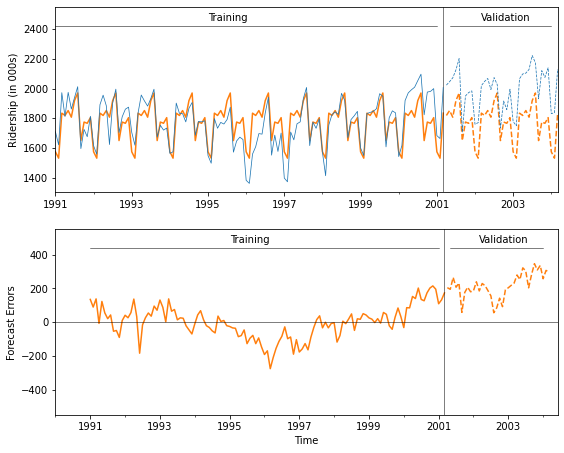

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5))
ridership_lm_season.predict(train_df).plot(ax=axes[0], color='C1')
ridership_lm_season.predict(valid_df).plot(ax=axes[0], color='C1', linestyle='dashed')
residual = train_df.Ridership - ridership_lm_season.predict(train_df)
residual.plot(ax=axes[1], color='C1')
residual = valid_df.Ridership - ridership_lm_season.predict(valid_df)
residual.plot(ax=axes[1], color='C1', linestyle='dashed')
graphLayout(axes, train_df, valid_df)
plt.show()

In [ ]:
train_df

,Ridership,const,Month
Date,,,
1991-01-01,1708.917,1.0,1
1991-02-01,1620.586,1.0,2
1991-03-01,1972.715,1.0,3
1991-04-01,1811.665,1.0,4
1991-05-01,1974.964,1.0,5
...,...,...,...
2000-11-01,1981.408,1.0,11
2000-12-01,2000.153,1.0,12
2001-01-01,1683.148,1.0,1


In [ ]:
ridership_df

,Ridership,const,Month
Date,,,
1991-01-01,1708.917,1.0,1
1991-02-01,1620.586,1.0,2
1991-03-01,1972.715,1.0,3
1991-04-01,1811.665,1.0,4
1991-05-01,1974.964,1.0,5
...,...,...,...
2003-11-01,2076.054,1.0,11
2003-12-01,2140.677,1.0,12
2004-01-01,1831.508,1.0,1


In [ ]:
ridership_df = tsatools.add_trend(ridership_ts, trend='ct')
ridership_df['Month'] = ridership_df.index.month
# partition the data
train_df = ridership_df[:nTrain]
valid_df = ridership_df[nTrain:]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
formula = 'Ridership ~ trend + np.square(trend) + C(Month)'
ridership_lm_trendseason = sm.ols(formula=formula, data=train_df).fit()

### Regression model with trend and seasonality applied to Amtrak ridership (a) and its forecast errors (b)


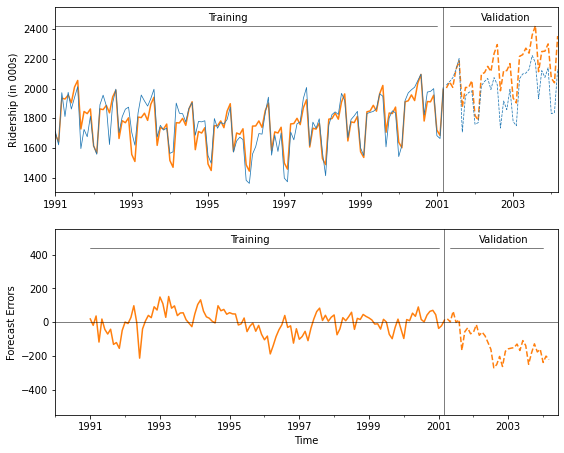

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5))
ridership_lm_trendseason.predict(train_df).plot(ax=axes[0], color='C1')
ridership_lm_trendseason.predict(valid_df).plot(ax=axes[0], color='C1', linestyle='dashed')
residual = train_df.Ridership - ridership_lm_trendseason.predict(train_df)
residual.plot(ax=axes[1], color='C1')
residual = valid_df.Ridership - ridership_lm_trendseason.predict(valid_df)
residual.plot(ax=axes[1], color='C1', linestyle='dashed')
graphLayout(axes, train_df, valid_df)
plt.show()


### Summary of output from fitting trend and seasonality to Amtrak ridership in the training period

In [ ]:
ridership_lm_trendseason.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     39.42
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           3.75e-35
Time:                        21:04:32   Log-Likelihood:                -691.27
No. Observations:                 123   AIC:                             1411.
Df Residuals:                     109   BIC:                             1450.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1696.9794     27.675     61.318      0.000    1642.128    1751.831
C(Month)[T.2]      -43.2458     30.241     -1.430      0.156    -103.182      16.690
C(Month)[T.3]      260.0149     30.242      8.598      0.000     200.076     319.954
C(Month)[T.4]      260.6175     31.021      8.401      0.000     199.135     322.100
C(Month)[T.5]      293.7966     31.020      9.471      0.000     232.316     355.278
C(Month)[T.6]      248.9615     31.020      8.026      0.000     187.481     310.442
C(Month)[T.7]      360.6340     31.020     11.626      0.000     299.153     422.115
C(Month)[T.8]      411.6513     31.021     13.270      0.000     350.169     473.134
C(Month)[T.9]       90.3162     31.022      2.911      0.004      28.831     151.801
C(Month)[T.10]     214.6037     31.024      6.917      0.000     153.115     276.092
C(Month)[T.11]     205.6711     31.026      6.629      0.000     144.178     267.165
C(Month)[T.12]     242.9294     31.029      7.829      0.000     181.430     304.429
trend               -7.1559      0.729     -9.812      0.000      -8.601      -5.710
np.square(trend)     0.0607      0.006     10.660      0.000       0.049       0.072
==============================================================================
Omnibus:                        7.382   Durbin-Watson:                   0.791
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.974
Skew:                          -0.529   Prob(JB):                       0.0306
Kurtosis:                       3.492   Cond. No.                     8.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Smoothing Methods


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Centered Moving Average for Visualization


In [ ]:
# Load data and convert to time series
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')

In [ ]:
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date, name='Ridership')

In [ ]:
ridership_ts.index = pd.DatetimeIndex(ridership_ts.index, freq=ridership_ts.index.inferred_freq)

In [ ]:
# Centered moving average with window size = 12
ma_centered = ridership_ts.rolling(12, center=True).mean()

In [ ]:
# Trailing moving average with window size = 12
ma_trailing = ridership_ts.rolling(12).mean()

## Centered moving average (smooth blue line) and trailing moving average (broken orange line) with window w = 12, overlaid on Amtrak ridership series

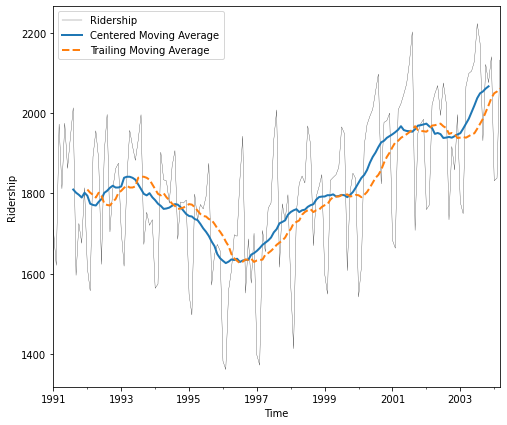

In [ ]:
# Shift the average by one time unit to get the next day predictions
ma_centered = pd.Series(ma_centered[:-1].values, index=ma_centered.index[1:])
ma_trailing = pd.Series(ma_trailing[:-1].values, index=ma_trailing.index[1:])
fig, ax = plt.subplots(figsize=(8, 7))
ax = ridership_ts.plot(ax=ax, color='black', linewidth=0.25)
ma_centered.plot(ax=ax, linewidth=2)
ma_trailing.plot(ax=ax, style='--', linewidth=2)
ax.set_xlabel('Time')
ax.set_ylabel('Ridership')
ax.legend(['Ridership', 'Centered Moving Average', 'Trailing Moving Average'])
plt.show()

## Trailing Moving Average for Forecasting

In [ ]:
# partition the data
nValid = 36
nTrain = len(ridership_ts) - nValid
train_ts = ridership_ts[:nTrain]
valid_ts = ridership_ts[nTrain:]

In [ ]:
# moving average on training
ma_trailing = train_ts.rolling(12).mean()
last_ma = ma_trailing[-1]

## Trailing moving average forecaster with w = 12 applied to Amtrak ridership series

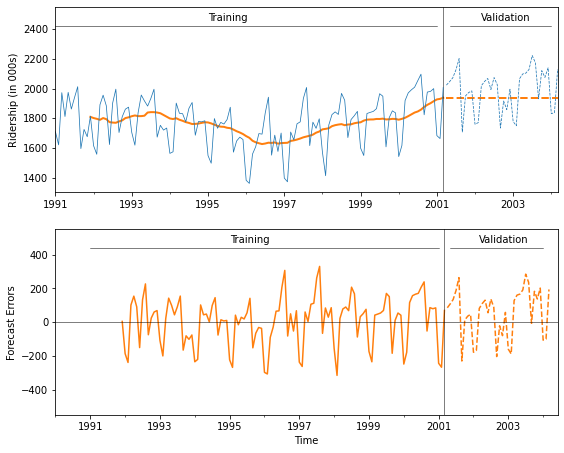

In [ ]:
# create forecast based on last moving average in the training period
ma_trailing_pred = pd.Series(last_ma, index=valid_ts.index)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5))
ma_trailing.plot(ax=axes[0], linewidth=2, color='C1')
ma_trailing_pred.plot(ax=axes[0], linewidth=2, color='C1', linestyle='dashed')
residual = train_ts - ma_trailing
residual.plot(ax=axes[1], color='C1')
residual = valid_ts - ma_trailing_pred
residual.plot(ax=axes[1], color='C1', linestyle='dashed')
graphLayout(axes, train_ts, valid_ts)

## Applying Moving Average to the residuals from the regression model (which lack trend and seasonality), to forecast the April 2001 residual

In [ ]:
# Build a model with seasonality, trend, and quadratic trend
ridership_df = tsatools.add_trend(ridership_ts, trend='ct')
ridership_df['Month'] = ridership_df.index.month

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
ridership_df

,Ridership,const,trend,Month
Date,,,,
1991-01-01,1708.917,1.0,1.0,1
1991-02-01,1620.586,1.0,2.0,2
1991-03-01,1972.715,1.0,3.0,3
1991-04-01,1811.665,1.0,4.0,4
1991-05-01,1974.964,1.0,5.0,5
...,...,...,...,...
2003-11-01,2076.054,1.0,155.0,11
2003-12-01,2140.677,1.0,156.0,12
2004-01-01,1831.508,1.0,157.0,1


In [ ]:
# partition the data
train_df = ridership_df[:nTrain]
valid_df = ridership_df[nTrain:]
formula = 'Ridership ~ trend + np.square(trend) + C(Month)'
ridership_lm_trendseason = sm.ols(formula=formula, data=train_df).fit()

In [ ]:
# create single-point forecast
ridership_prediction = ridership_lm_trendseason.predict(valid_df.iloc[0, :])

In [ ]:
# apply Moving Average to residuals
ma_trailing = ridership_lm_trendseason.resid.rolling(12).mean()
print('Prediction', ridership_prediction[0])
print('Moving_Average_trailing', ma_trailing[-1])

Prediction 2004.2708927644999
Moving_Average_trailing 30.780684624059024


## Simple Exponential Smoothing

### Choosing Smoothing Parameter α

## Output for simple exponential smoothing forecaster with = 0.2, applied to the series of residuals from the regression model (which lack trend and seasonality). The forecast value is 14.143


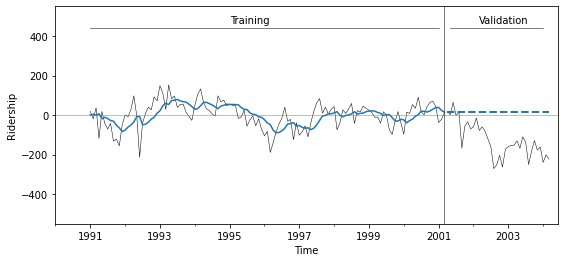

In [ ]:
residuals_ts = ridership_lm_trendseason.resid
residuals_pred = valid_df.Ridership - ridership_lm_trendseason.predict(valid_df)
fig, ax = plt.subplots(figsize=(9,4))
ridership_lm_trendseason.resid.plot(ax=ax, color='black', linewidth=0.5)
residuals_pred.plot(ax=ax, color='black', linewidth=0.5)
ax.set_ylabel('Ridership')
ax.set_xlabel('Time')
ax.axhline(y=0, xmin=0, xmax=1, color='grey', linewidth=0.5)

# Run Exponential Smoothing
# with smoothing level alpha = 0.2
expSmooth = ExponentialSmoothing(residuals_ts, freq='MS')
expSmoothFit = expSmooth.fit(smoothing_level=0.2)
expSmoothFit.fittedvalues.plot(ax=ax)
expSmoothFit.forecast(len(valid_ts)).plot(ax=ax, style='--', linewidth=2, color='C0')
singleGraphLayout(ax, [-550, 550], train_df, valid_df)

In [ ]:
expSmoothFit.fittedvalues

Date
1991-01-01     0.000000
1991-02-01     3.806549
1991-03-01    -0.770519
1991-04-01     6.711901
1991-05-01   -18.286543
                ...    
2000-11-01    29.464930
2000-12-01    37.593568
2001-01-01    38.921429
2001-02-01    23.671912
2001-03-01    14.651679
Length: 123, dtype: float64

In [ ]:
expSmoothFit.forecast(len(valid_ts))

2001-04-01    14.142855
2001-05-01    14.142855
2001-06-01    14.142855
2001-07-01    14.142855
2001-08-01    14.142855
2001-09-01    14.142855
2001-10-01    14.142855
2001-11-01    14.142855
2001-12-01    14.142855
2002-01-01    14.142855
2002-02-01    14.142855
2002-03-01    14.142855
2002-04-01    14.142855
2002-05-01    14.142855
2002-06-01    14.142855
2002-07-01    14.142855
2002-08-01    14.142855
2002-09-01    14.142855
2002-10-01    14.142855
2002-11-01    14.142855
2002-12-01    14.142855
2003-01-01    14.142855
2003-02-01    14.142855
2003-03-01    14.142855
2003-04-01    14.142855
2003-05-01    14.142855
2003-06-01    14.142855
2003-07-01    14.142855
2003-08-01    14.142855
2003-09-01    14.142855
2003-10-01    14.142855
2003-11-01    14.142855
2003-12-01    14.142855
2004-01-01    14.142855
2004-02-01    14.142855
2004-03-01    14.142855
Freq: MS, dtype: float64

In [ ]:
residuals_ts

Date
1991-01-01     19.032747
1991-02-01    -19.078792
1991-03-01     36.641578
1991-04-01   -118.280315
1991-05-01     18.448736
                 ...    
2000-11-01     70.108121
2000-12-01     44.232870
2001-01-01    -37.326156
2001-02-01    -21.429254
2001-03-01     12.107558
Length: 123, dtype: float64

In [ ]:
expSmoothFit.forecast(len(valid_ts))

2001-04-01    1993.315774
2001-05-01    2029.123674
2001-06-01    1986.115132
2001-07-01    2093.039514
2001-08-01    2138.585819
2001-09-01    1812.616212
2001-10-01    1937.543577
2001-11-01    1928.055491
2001-12-01    1971.077357
2002-01-01    1733.964016
2002-02-01    1697.284552
2002-03-01    2004.330842
2002-04-01    2002.224915
2002-05-01    2038.032815
2002-06-01    1995.024274
2002-07-01    2101.948655
2002-08-01    2147.494960
2002-09-01    1821.525353
2002-10-01    1946.452719
2002-11-01    1936.964632
2002-12-01    1979.986498
2003-01-01    1742.873157
2003-02-01    1706.193694
2003-03-01    2013.239984
2003-04-01    2011.134056
2003-05-01    2046.941957
2003-06-01    2003.933415
2003-07-01    2110.857797
2003-08-01    2156.404102
2003-09-01    1830.434495
2003-10-01    1955.361860
2003-11-01    1945.873773
2003-12-01    1988.895640
2004-01-01    1751.782299
2004-02-01    1715.102835
2004-03-01    2022.149125
Freq: MS, dtype: float64

## Relation Between Moving Average and Simple Exponential Smoothing


## Advanced Exponential Smoothing

### Series with a Trend

### Series with a Trend and Seasonality

## Holt-Winters exponential smoothing applied to Amtrak ridership series


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


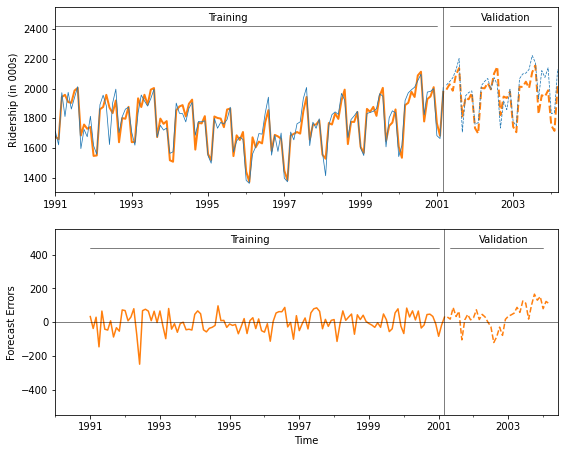

In [ ]:
# Run exponential smoothing with additive trend and additive seasonal
expSmooth = ExponentialSmoothing(train_ts, trend='additive', seasonal='additive', seasonal_periods=12, freq='MS')
expSmoothFit = expSmooth.fit()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7.5))
expSmoothFit.fittedvalues.plot(ax=axes[0], linewidth=2, color='C1')
expSmoothFit.forecast(len(valid_ts)).plot(ax=axes[0], linewidth=2, color='C1', linestyle='dashed')
residual = train_ts - expSmoothFit.fittedvalues
residual.plot(ax=axes[1], color='C1')
residual = valid_ts - expSmoothFit.forecast(len(valid_ts))
residual.plot(ax=axes[1], color='C1', linestyle='dashed')
graphLayout(axes, train_ts, valid_ts)

## Summary of a Holt-Winter’s exponential smoothing model applied to the Amtrak ridership data. Included are the initial and final states


In [ ]:
print(expSmoothFit.params)
print('AIC: ', expSmoothFit.aic)
print('AICc: ', expSmoothFit.aicc)
print('BIC: ', expSmoothFit.bic)

{'smoothing_level': 0.5786338336977329, 'smoothing_slope': 2.00216914250489e-76, 'smoothing_seasonal': 1.0271338778859024e-45, 'damping_slope': nan, 'initial_level': 1645.807904806843, 'initial_slope': 0.7424284517844651, 'initial_seasons': array([ 29.15773613,  -8.26415589, 298.03970562, 295.19135008,
       330.25682186, 286.5058517 , 392.68780481, 437.49168162,
       110.77964628, 234.96458298, 224.73406781, 267.01350589]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
AIC:  1022.8660790645175
AICc:  1029.4430021414405
BIC:  1067.8610287504762


### Series with Seasonality (No Trend)

# Exponential smoothing in Python

In Python, forecasting using exponential smoothing can be done via the ExponentialSmoothing method in the statsmodels class.

This can be used for simple exponential smoothing as well as advanced exponential smoothing.

Applying this method to a time series and using forecast() or predict() will yield forecasts. 

To include an additive or multiplicative trend and/or seasonality, use arguments trend and seasonal, such as trend=’additive’ and seasonal=’multiplicative’. The default is None. 

The number of seasons is specified by
seasonal_periods. You can set the smoothing parameters to specific values using arguments smoothing_level (α), smoothing_slope (β), and smoothing_seasonal (γ). 

Leaving them unspecified will lead to optimized values (optimized=True).